In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [3]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [4]:
dp = pd.DataFrame()
dp["employee_id"] = df_test["employee_id"]

In [5]:
#employee_id is all unique so it will not effect the model prediction, let's drop it
df_train = df_train.drop("employee_id", axis =1)
df_test = df_test.drop("employee_id", axis =1)

In [6]:
df_train.head(100)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


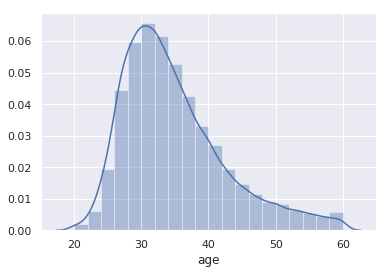

In [9]:
sns.set(color_codes=True)
sns.distplot(df_train["age"], bins=20);

In [10]:
#sns.jointplot(x="age", y="is_promoted", data=df_train);

In [11]:
#sns.pairplot(df_train);

In [12]:
#df_train.isnull().sum(), df_test.isnull().sum()

In [13]:
df_train["previous_year_rating"][df_train["previous_year_rating"].isnull() ==True] = 0
df_test["previous_year_rating"][df_test["previous_year_rating"].isnull() ==True] = 0

/home/geekkishor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/geekkishor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
df_train.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [15]:
df_train["education"][df_train["education"].isnull() ==True] = 'No Education'
df_test["education"][df_test["education"].isnull() ==True] = 'No Education'

/home/geekkishor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/geekkishor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [17]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [18]:
#logistic regression
is_promoted = df_train["is_promoted"]
df_train = df_train.drop("is_promoted", axis=1)

In [19]:
df_train["recruitment_channel"].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [20]:
#department-------> onehot encoding(get dummies)
#region ----------> onehot encoding
#education---------> level encoding(ordinal data)
#gender -----------> 0 or 1
#recruitment_channel --------> onehot encoding

In [21]:
df = pd.get_dummies(df_train["department"],columns="department", prefix_sep='_')
df_c = pd.concat([df.reset_index(drop=True), df_train], axis=1)
df_c = df_c.drop("department", axis=1)

In [22]:
df = pd.get_dummies(df_test["department"],columns="department", prefix_sep='_')
df_t = pd.concat([df.reset_index(drop=True), df_test], axis=1)
df_t = df_t.drop("department", axis=1)

In [23]:
df = pd.get_dummies(df_train["region"],columns="region", prefix_sep='_')
df_c = pd.concat([df.reset_index(drop=True), df_c], axis=1)
df_c = df_c.drop("region", axis=1)

In [24]:
df = pd.get_dummies(df_test["region"],columns="region", prefix_sep='_')
df_t = pd.concat([df.reset_index(drop=True), df_t], axis=1)
df_t = df_t.drop("region", axis=1)

In [25]:
df = pd.get_dummies(df_train["recruitment_channel"],columns="recruitment_channel", prefix_sep='_')
df_c = pd.concat([df.reset_index(drop=True), df_c], axis=1)
df_c = df_c.drop("recruitment_channel", axis=1)

In [26]:
df = pd.get_dummies(df_test["recruitment_channel"],columns="recruitment_channel", prefix_sep='_')
df_t = pd.concat([df.reset_index(drop=True), df_t], axis=1)
df_t = df_t.drop("recruitment_channel", axis=1)

In [27]:
df_c["education"].unique()

array(["Master's & above", "Bachelor's", 'No Education',
       'Below Secondary'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_c["education"] = labelencoder.fit_transform(df_c["education"])
df_t["education"] = labelencoder.fit_transform(df_t["education"])

In [29]:
df_c["gender"] = labelencoder.fit_transform(df_c["gender"])
df_t["gender"] = labelencoder.fit_transform(df_t["gender"])

In [30]:
#df_c.head()

In [31]:
#df_t.head()

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(df_c,is_promoted, test_size=0.2, random_state=23)

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [34]:
col = X_train.columns

In [35]:
X_res, Y_res = sm.fit_resample(X_train, Y_train)

In [36]:
col = X_train.columns

In [37]:
X_res= pd.DataFrame(X_res, columns=col)

In [38]:
m = LogisticRegression()

In [39]:
#Max_feature and min_feature
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=False)

In [40]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [41]:
from xgboost import XGBClassifier
m = XGBClassifier(n_estimators= 550,eta =0.01,min_child_weight = 6,max_depth=5,gamma =0.003,subsample =0.8,scale_pos_weight =2)

In [42]:
m = m.fit(X_res, Y_res)

In [43]:
Y_pred = m.predict(X_test)

In [44]:
confusion_matrix(Y_pred, Y_test)

array([[9842,  538],
       [ 185,  397]])

In [45]:
Y_pred.shape

(10962,)

In [46]:
score = f1_score(Y_test, Y_pred)

In [47]:
score

0.5234014502307185

In [48]:
df_pred = m.predict(df_t)

In [49]:
dp["is_promoted"]=df_pred

In [50]:
#convert dataframe into csv file
dp.to_dense().to_csv("submission.csv", index = False, sep=',', encoding='utf-8')

In [51]:
#========================================one more try==========================

In [63]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [64]:
from datetime import datetime
def perform_model(model, X_train, Y_train, X_test, Y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, Y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(Y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(Y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

In [65]:
import matplotlib.pyplot as plt

In [66]:
from datetime import datetime
def perform_model(model, X_train, Y_train, X_test, Y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, Y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=Y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(Y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(Y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [67]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   36.4s finished
/home/geekkishor/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:48.597714


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.002495


---------------------
|      Accuracy      |
---------------------

    0.9325852946542602


--------------------
| Confusion Matrix |
--------------------

 [[9975   52]
 [ 687  248]]


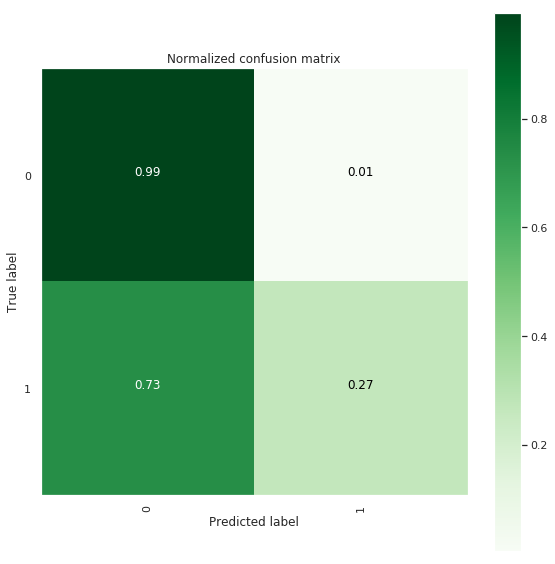

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10027
           1       0.83      0.27      0.40       935

   micro avg       0.93      0.93      0.93     10962
   macro avg       0.88      0.63      0.68     10962
weighted avg       0.93      0.93      0.92     10962



In [70]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, Y_train, X_test, Y_test, class_labels=[0,1])

In [71]:
#Linear SVC gridSearch

In [72]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/home/geekkishor/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   44.9s finished
/home/geekkishor/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:53.347029


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.003127


---------------------
|      Accuracy      |
---------------------

    0.9295748950921364


--------------------
| Confusion Matrix |
--------------------

 [[10020     7]
 [  765   170]]


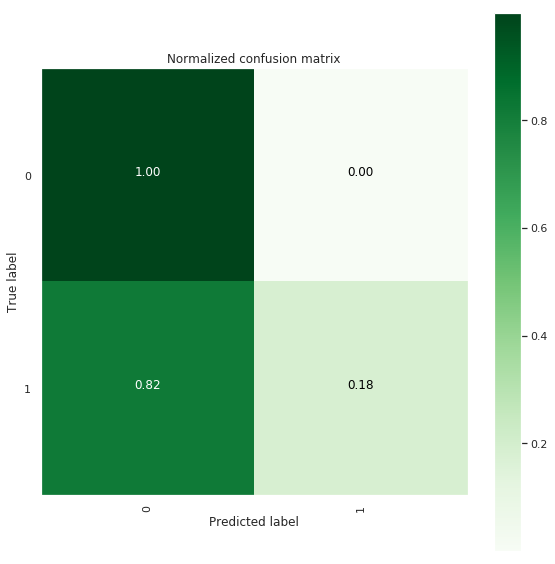

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10027
           1       0.96      0.18      0.31       935

   micro avg       0.93      0.93      0.93     10962
   macro avg       0.94      0.59      0.63     10962
weighted avg       0.93      0.93      0.91     10962



In [75]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, Y_train, X_test, Y_test, class_labels=[0,1])

In [76]:
#Kernal SVM with Grid search

In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, Y_train, X_test, Y_test, class_labels=[0,1])

training the model..


/home/geekkishor/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/geekkishor/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/geekkishor/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/geekkishor/anaconda3/envs/env/lib/python3.6/site-packages/

In [ ]:
#Decision tree with Grid search

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, Y_train, X_test, Y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

In [ ]:
#Random forest with Grid search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, Y_train, X_test, Y_test, class_labels=[0,1])
print_grid_search_attributes(rfc_grid_results['model'])

In [ ]:
#Gradient boasted decision tree with Grid search

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, Y_train, X_test, Y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

In [ ]:
#comparing all models

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))